## CNN with Keras, MNIST data

In this file, we will see how to build simple CNN with Keras,
and check whether it works ok.

In [1]:
"""
Get MNIST data and reshape as 4d tensor.
"""

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((*x_train.shape, 1))
y_train = to_categorical(y_train)

x_test = x_test.reshape((*x_test.shape, 1))
y_test = to_categorical(y_test)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


y_train[0]:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


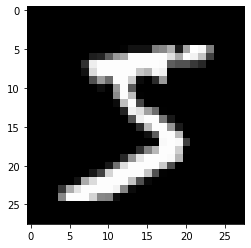

In [2]:
"""
Check the image
"""

from matplotlib import pyplot as plt

print('y_train[0]: ', y_train[0])
plt.imshow(x_train[0].squeeze(), cmap='gray')

In [3]:
"""
Scale values on X
"""

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
"""
Create model with Conv2D

Commonly, we shrink the width, height by kernel and pooling,
but increase the depth as it goes.

After feature extraction(Conv2D, pooling...), we add Dense layer to do classification.
"""

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          1168      
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4

Let's look at the summary and calculate the # of parameters.

- First conv2d, will result 40, 
    cause: (1 kernel + 1 bias) * depth of 4 = (3 * 3 + 1) * 4 = 40.

- Second conv2d, will result 296,
    cause: (4 kernel + 1 bias) * depth of 8 = (3 * 3 * 4 + 1) * 8 = 296.

- Third conv2d will result 1168,
    cause: (8 kernel + 1 bias) * depth of 16 = (3 * 3 * 8 + 1) * 16 = 1169.

- In dense layer, it will each result 32 * 145 = 4640, 10 * 33 = 330.

In [5]:
"""
fit model (train) with data
"""

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10
844/844 [==============================] - 13s 15ms/step - loss: 0.4275 - accuracy: 0.8642 - val_loss: 0.1358 - val_accuracy: 0.9587
Epoch 2/10
844/844 [==============================] - 14s 16ms/step - loss: 0.1372 - accuracy: 0.9579 - val_loss: 0.0907 - val_accuracy: 0.9735
Epoch 3/10
844/844 [==============================] - 13s 16ms/step - loss: 0.1023 - accuracy: 0.9681 - val_loss: 0.0789 - val_accuracy: 0.9788
Epoch 4/10
844/844 [==============================] - 14s 17ms/step - loss: 0.0847 - accuracy: 0.9731 - val_loss: 0.0804 - val_accuracy: 0.9788
Epoch 5/10
844/844 [==============================] - 14s 16ms/step - loss: 0.0728 - accuracy: 0.9768 - val_loss: 0.0576 - val_accuracy: 0.9850
Epoch 6/10
844/844 [==============================] - 13s 15ms/step - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.0643 - val_accuracy: 0.9825
Epoch 7/10
844/844 [==============================] - 12s 14ms/step - loss: 0.0581 - accuracy: 0.9819 - val_loss: 0.0616 - val_accuracy:

In [6]:
"""
Evaluate with test set
"""

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0479 - accuracy: 0.9844
Test loss:  0.047851551324129105
Test accuracy:  0.9843999743461609


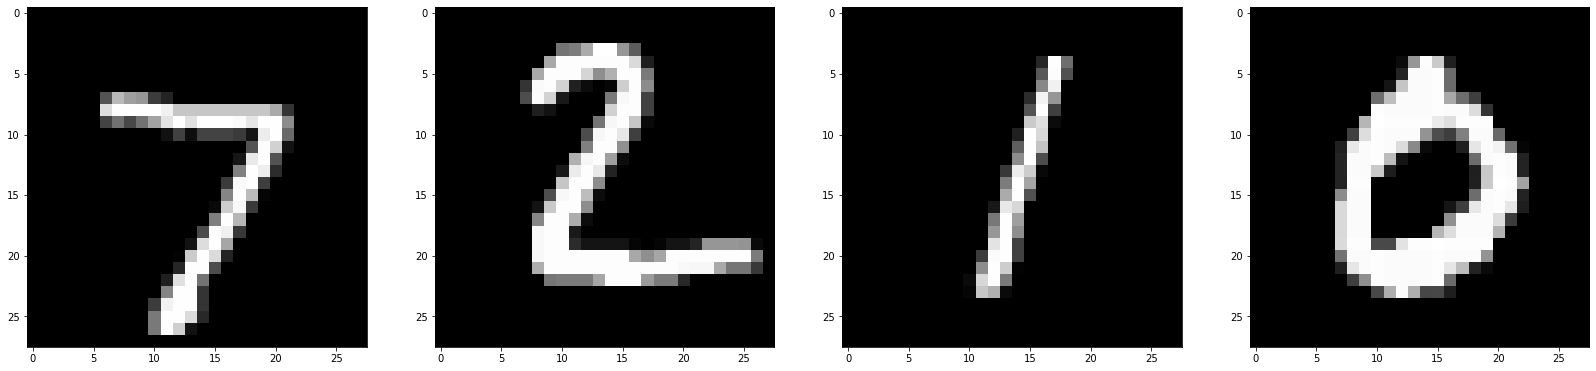

y_test[0:4]: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
predictions:  [7, 2, 1, 0]


In [7]:
"""
make predictions using model
"""

import numpy as np

predictions = model.predict(x_test[0:4])

figure = plt.figure(figsize=(28, 28))
for i in range(1, 5):
    figure.add_subplot(1, 4, i)
    plt.imshow(x_test[i-1] * 255, cmap='gray')
plt.show()

print('y_test[0:4]: \n', y_test[0:4])
print('predictions: ', [np.argmax(p) for p in predictions])